In [1]:
import ROOT
import healpy as hp

Welcome to JupyROOT 6.24/06


In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.legend import Legend
import array
from math import sqrt, fabs, sin, exp, log10
from ROOT import TFile, TTree, TChain, TBranch, TH1D, TH1I, TH1F, TH2F, Math
from ROOT import TLorentzVector
from ROOT.Math import LorentzVector, VectorUtil

In [3]:
tfile = TFile.Open('ntuple_cern2.root')
#tfile = TFile.Open('ntuple.root')
#tfile = TFile.Open('ntuple_1k.root')
print(tfile)
tree = tfile.Get("qcdtree")
print(tree)

Name: ntuple_cern2.root Title: 
Name: qcdtree Title: qcdtree


In [4]:
branches = tree.GetListOfBranches()
leaves = tree.GetListOfLeaves()

In [5]:
for lv in leaves:
    lvname = lv.GetName()
    print(lv)

Name: nGenParticles Title: nGenParticles
Name: genStatus Title: genStatus[nGenParticles]
Name: genPdgId Title: genPdgId[nGenParticles]
Name: genM Title: genM[nGenParticles]
Name: genPx Title: genPx[nGenParticles]
Name: genPy Title: genPy[nGenParticles]
Name: genPz Title: genPz[nGenParticles]
Name: nGenJets Title: nGenJets
Name: genJetM Title: genJetM[nGenJets]
Name: genJetPx Title: genJetPx[nGenJets]
Name: genJetPy Title: genJetPy[nGenJets]
Name: genJetPz Title: genJetPz[nGenJets]
Name: nGenJetParticles Title: nGenJetParticles[nGenJets]
Name: genJetParticleStatus Title: genJetParticleStatus
Name: genJetParticlePdgId Title: genJetParticlePdgId
Name: genJetParticleMvec Title: genJetParticleMvec
Name: genJetParticlePxvec Title: genJetParticlePxvec
Name: genJetParticlePyvec Title: genJetParticlePyvec
Name: genJetParticlePzvec Title: genJetParticlePzvec


In [6]:
nevt = 10
nentries = tree.GetEntries()
print("Number of events: ",nentries, "  printout every ",nevt)

Number of events:  10   printout every  10


In [7]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        #for ipart in range(tree.nGenJetParticles[ijet]):
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
Genjets:  16
30 117.85346899999999 -2746.268644095081 1374.9113236377466 582.7829075138067
106 247.714477 2639.169214223319 -1193.7040997525235 -2311.4354545895953
47 30.126704999999998 18.015197300397016 -188.81567480824353 375.0599530234526
35 28.915689 20.802414023293654 -105.86260389441041 -26.929356942980277
43 27.179 91.0548184341927 40.24929135271393 4.615777226647097
42 17.229568 0.3857992554730039 51.954187405682525 414.74522375032666
21 14.917508 -4.4631948541639765 41.48357114708137 -22.905779689371073
34 14.656744999999999 1.6100335388328084 -27.960150781290423 242.09569043148082
27 10.563125 -16.438051943344387 2.7803055208360083 56.845466350344786
28 9.715010999999999 5.957217689165054 14.862639594391386 -80.42753491314116
10 5.138631 -8.021145731900688 2.224940872264929 -9.22456934436065
14 5.731122 -5.4627608754548245 -5.506548796655239 -45.43756342441099
5 2.339076 6.491857447455152 -1.504645752291677 -16.63515451259035
13 2.2959739999999997 -6.458

In [8]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4jet += p4part
            #print(tree.genJetParticleStatus[iptot+ipart],tree.genJetParticlePdgId[iptot+ipart],tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]
        if iev%nevt==0:
            print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())

Processing event:  0
Genjets:  16
30 117.85346899999999 -2746.268644095081 1374.9113236377466 582.7829075138067
 redo: 117.85339656709486 -2746.26854272927 1374.91169032395 582.7829283968814
106 247.714477 2639.169214223319 -1193.7040997525235 -2311.4354545895953
 redo: 247.71442008353154 2639.1691492320533 -1193.7040782815197 -2311.4353874329104
47 30.126704999999998 18.015197300397016 -188.81567480824353 375.0599530234526
 redo: 30.12669059150841 18.015189851022104 -188.81568168401589 375.05998136166653
35 28.915689 20.802414023293654 -105.86260389441041 -26.929356942980277
 redo: 28.91567892801906 20.802414012179305 -105.8626023875171 -26.92935700381239
43 27.179 91.0548184341927 40.24929135271393 4.615777226647097
 redo: 27.17898524622343 91.05481964697555 40.24929334234161 4.615777278883599
42 17.229568 0.3857992554730039 51.954187405682525 414.74522375032666
 redo: 17.229553753719483 0.3858021417962702 51.95418834228747 414.7452042202747
21 14.917508 -4.4631948541639765 41.483571

In [9]:
jet_test = []
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        #print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            # p4part are the jet generator particle 4-momenta in the lab frame
            p4jet += p4part
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        #print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())
        cmJet = p4jet.BoostToCM()
        if iev%nevt==0:
            print(" cmJet Boost:",cmJet.x(),cmJet.y(),cmJet.z())
        p4jetcmjet = VectorUtil.boost(p4jet, cmJet)
        if iev%nevt==0:
            print(" cmJet:",p4jetcmjet.mass(),p4jetcmjet.px(),p4jetcmjet.py(),p4jetcmjet.pz())
        p4jetcm = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        jet_particle_test = []
        sump2cmjet = 0.0
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4partcmjet = VectorUtil.boost(p4part, cmJet)
            # p4partcmjet are the jet generator particle 4-momenta in the jet center-of-mass
            p4jetcm += p4partcmjet
#            if (iev==0 and ijet==1): # test on 2nd jet in 1st event
#restrict to charged particles charged pions abs(pdgId)=211, charged kaons abs(pdgId)=321 and protons abd(pdgId)=2212, electrons abs(pdgId)=11, muons abs(pdgId)=13, tau abs(pdgId)=15
            if (abs(pdgId)==211 or abs(pdgId)==321 or abs(pdgId)==2212 or abs(pdgId)==11 or abs(pdgId)==13 or abs(pdgId)==15):
                jet_particle_test.append(p4partcmjet) # p4part p4partcmjet for lab or rest frame
                sump2cmjet+=p4partcmjet.px()*p4partcmjet.px()+p4partcmjet.py()*p4partcmjet.py()+p4partcmjet.pz()*p4partcmjet.pz()
        if (sump2cmjet>50.0*50.0):
            print("new jet sump2 = ",sump2cmjet)
            jet_test.append(jet_particle_test)
        if iev%nevt==0:
            print(" cmredo:",p4jetcm.mass(),p4jetcm.px(),p4jetcm.py(),p4jetcm.pz())
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
Genjets:  16
 cmJet Boost: 0.8778951513082769 -0.4395157602515105 -0.1862972608630638
 cmJet: 117.85339656709338 -1.4551915228366852e-11 0.0 1.8189894035458565e-12
 cmredo: 117.8533965671164 1.7216228442862302e-11 -7.016165426421139e-12 -3.2404634531246757e-12
 cmJet Boost: -0.7105887858465392 0.321401427374576 0.6223474027788656
 cmJet: 247.714420083535 7.275957614183426e-12 -3.637978807091713e-12 -7.275957614183426e-12
 cmredo: 247.71442008353662 2.3721580255653407e-12 -3.301831030810831e-12 -7.697453785482367e-12
 cmJet Boost: -0.04275374917794286 0.4480984303988732 -0.8900944426578357
 cmJet: 30.126690591508932 -2.842170943040401e-14 0.0 -9.094947017729282e-13
 cmredo: 30.126690591508034 -1.208842054234438e-14 8.99419427824455e-14 -4.842515277658777e-13
 cmJet Boost: -0.1810553422168687 0.9213829554598041 0.23438164172441125
 cmJet: 28.915678928019066 1.4210854715202004e-14 0.0 -1.4210854715202004e-14
 cmredo: 28.915678928019112 -6.386384476808615e-15 3.1193797

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


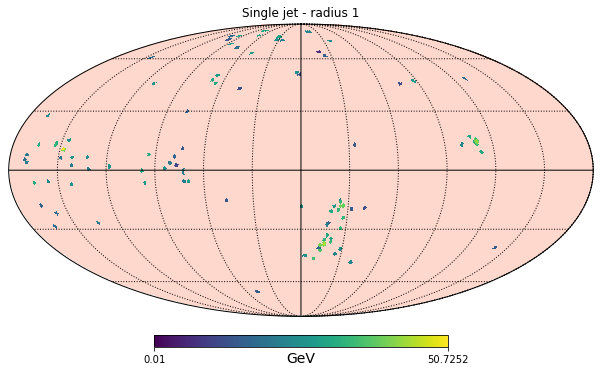

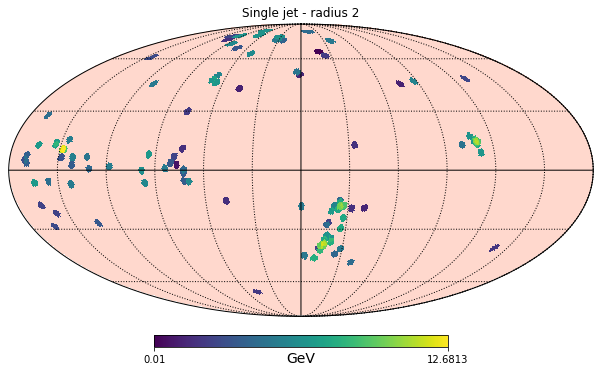

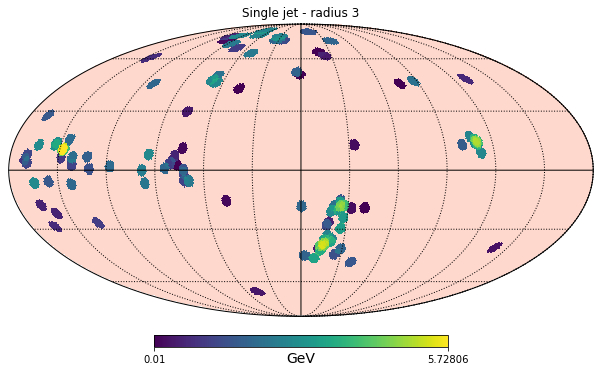

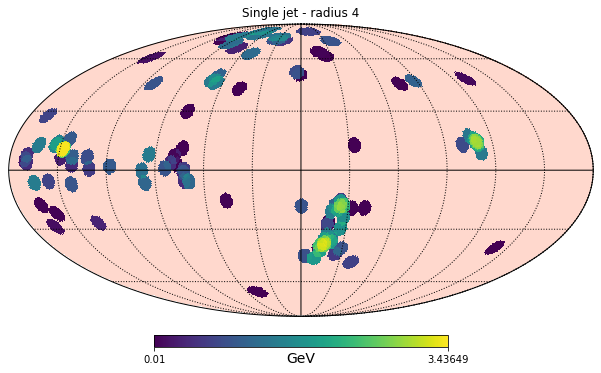

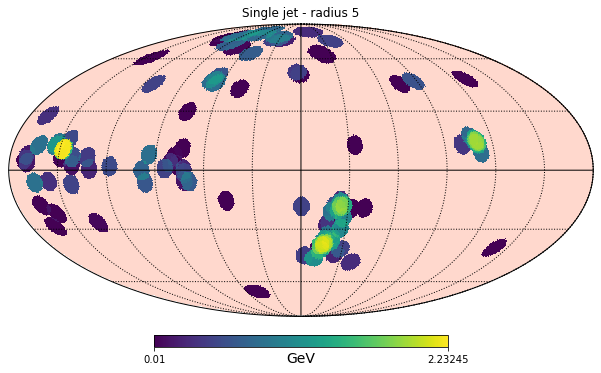

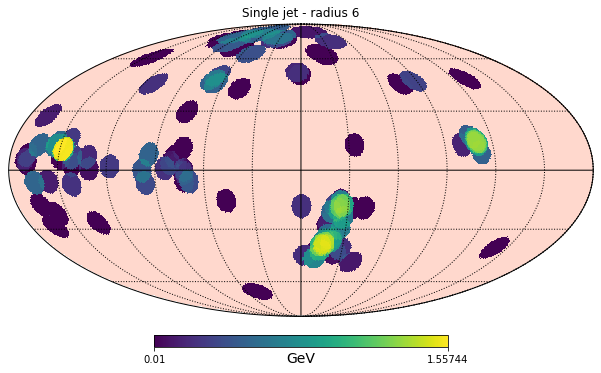

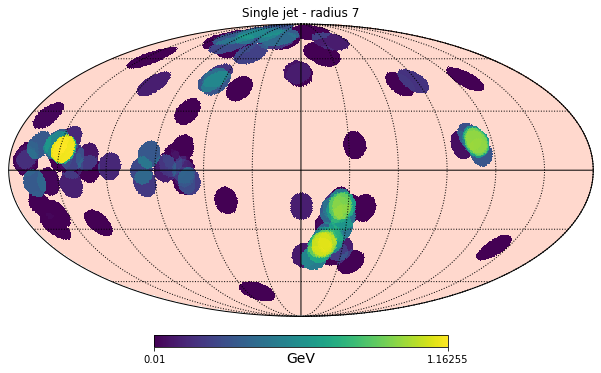

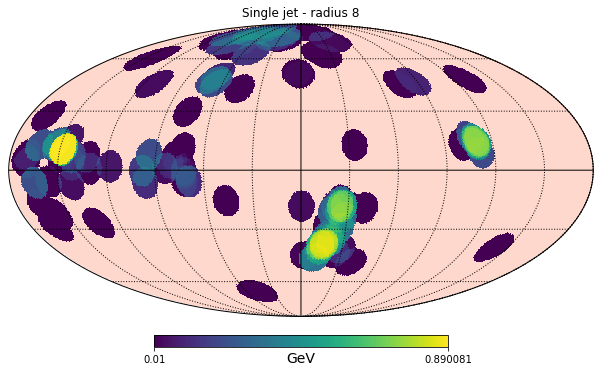

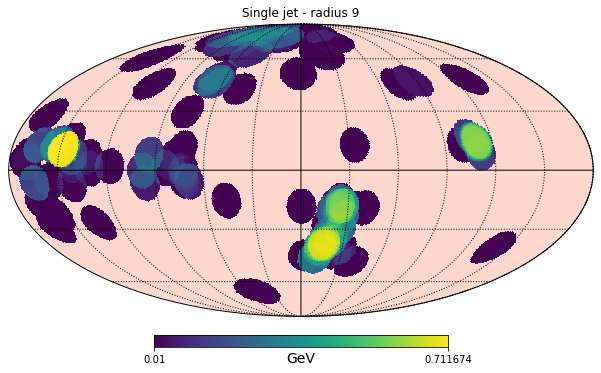

In [10]:
lmax = 150
ls = np.array(range(1,lmax+1))
nside = 128
NPIX = hp.nside2npix(nside)
for n in range(1,10,1):
    ijet = 0
    cls_list = []
    for jet_particle_test in jet_test:
        m = np.zeros(NPIX) # blank map
        ijet+=1
        for part in jet_particle_test:
            vec = hp.ang2vec(part.theta(), part.phi())
            ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(n)) # all pixels within 1 degree of vector
            m[ipix_disc] += part.energy()/(np.pi*n*n) # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
        if ijet==3:
            hp.visufunc.mollview(m, title=r'Single jet - radius '+ str(n), unit=r'GeV', min=0.01, norm='log', badcolor='#FFD8CD')
            hp.graticule() # draw grid lines

Radii: [1, 2, 3, 4, 5, 6, 7, 8, 9]


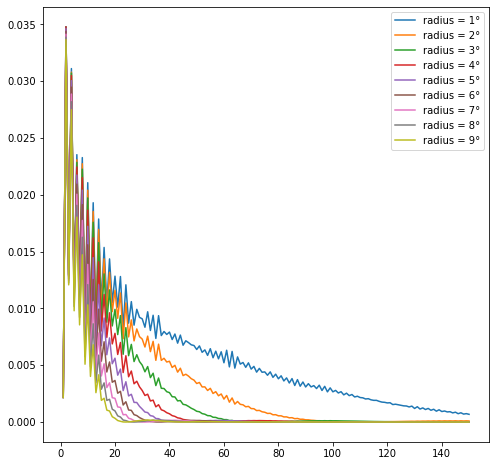

In [11]:
lmax = 150
ls = np.array(range(1,lmax+1))
nside = 128
NPIX = hp.nside2npix(nside)
radii=[]
plt.figure(figsize=(8,8))

for n in range(1,10,1):
    ijet = 0
    cls_list = []
    for jet_particle_test in jet_test:
        m = np.zeros(NPIX) # blank map
        ijet+=1
        for part in jet_particle_test:
            vec = hp.ang2vec(part.theta(), part.phi())
            ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(n)) # all pixels within 1 degree of vector
            m[ipix_disc] += part.energy()/(n*n) # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
        #if ijet==3:
            #hp.visufunc.mollview(m, title=r'Single jet - radius '+ str(n), unit=r'GeV', min=0.01, norm='log', badcolor='#FFD8CD')
            #hp.graticule() # draw grid lines
            
#Plot angular power spectrum for each jet
    icls = 0
    for cls_test in cls_list:
        icls+=1
        if (icls == 1):
            cls_hp = cls_test
        else:
            cls_hp+= cls_test
    #plt.semilogy(ls,cls_hp[ls],label='radius = ' + str(n))
    plt.plot(ls,cls_hp[ls],label='radius = ' + str(n) + '°')

    radii.append(n)
print('Radii: ' + str(radii))
plt.legend()

In [12]:
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        #for ipart in range(tree.nGenJetParticles[ijet]):
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]
        
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev%nevt==0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4jet += p4part
            #print(tree.genJetParticleStatus[iptot+ipart],tree.genJetParticlePdgId[iptot+ipart],tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]
        if iev%nevt==0:
            print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())
            
jet_test = []
for iev in range(nentries):
    if iev%nevt==0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev%nevt==0:
        print("Genjets: ",tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        #print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            # p4part are the jet generator particle 4-momenta in the lab frame
            p4jet += p4part
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        #print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())
        cmJet = p4jet.BoostToCM()
        if iev%nevt==0:
            print(" cmJet Boost:",cmJet.x(),cmJet.y(),cmJet.z())
        p4jetcmjet = VectorUtil.boost(p4jet, cmJet)
        if iev%nevt==0:
            print(" cmJet:",p4jetcmjet.mass(),p4jetcmjet.px(),p4jetcmjet.py(),p4jetcmjet.pz())
        p4jetcm = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        jet_particle_test = []
        sump2cmjet = 0.0
        for ipart in range(tree.nGenJetParticles[ijet]):
            status = tree.genJetParticleStatus[iptot+ipart]
            pdgId = tree.genJetParticlePdgId[iptot+ipart]
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = np.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4partcmjet = VectorUtil.boost(p4part, cmJet)
            # p4partcmjet are the jet generator particle 4-momenta in the jet center-of-mass
            p4jetcm += p4partcmjet
#            if (iev==0 and ijet==1): # test on 2nd jet in 1st event
#restrict to charged particles charged pions abs(pdgId)=211, charged kaons abs(pdgId)=321 and protons abd(pdgId)=2212, electrons abs(pdgId)=11, muons abs(pdgId)=13, tau abs(pdgId)=15
            if (abs(pdgId)==211 or abs(pdgId)==321 or abs(pdgId)==2212 or abs(pdgId)==11 or abs(pdgId)==13 or abs(pdgId)==15):
                jet_particle_test.append(p4part) #cmjet) # p4part p4partcmjet for lab or rest frame
                sump2cmjet+=p4partcmjet.px()*p4partcmjet.px()+p4partcmjet.py()*p4partcmjet.py()+p4partcmjet.pz()*p4partcmjet.pz()
        if (sump2cmjet>50.0*50.0):
            print("new jet sump2 = ",sump2cmjet)
            jet_test.append(jet_particle_test)
        if iev%nevt==0:
            print(" cmredo:",p4jetcm.mass(),p4jetcm.px(),p4jetcm.py(),p4jetcm.pz())
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
Genjets:  16
30 117.85346899999999 -2746.268644095081 1374.9113236377466 582.7829075138067
106 247.714477 2639.169214223319 -1193.7040997525235 -2311.4354545895953
47 30.126704999999998 18.015197300397016 -188.81567480824353 375.0599530234526
35 28.915689 20.802414023293654 -105.86260389441041 -26.929356942980277
43 27.179 91.0548184341927 40.24929135271393 4.615777226647097
42 17.229568 0.3857992554730039 51.954187405682525 414.74522375032666
21 14.917508 -4.4631948541639765 41.48357114708137 -22.905779689371073
34 14.656744999999999 1.6100335388328084 -27.960150781290423 242.09569043148082
27 10.563125 -16.438051943344387 2.7803055208360083 56.845466350344786
28 9.715010999999999 5.957217689165054 14.862639594391386 -80.42753491314116
10 5.138631 -8.021145731900688 2.224940872264929 -9.22456934436065
14 5.731122 -5.4627608754548245 -5.506548796655239 -45.43756342441099
5 2.339076 6.491857447455152 -1.504645752291677 -16.63515451259035
13 2.2959739999999997 -6.458

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


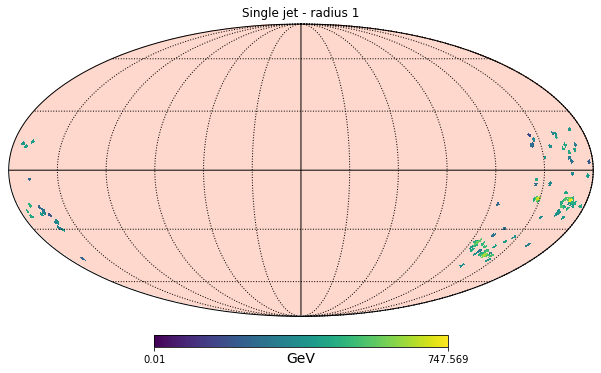

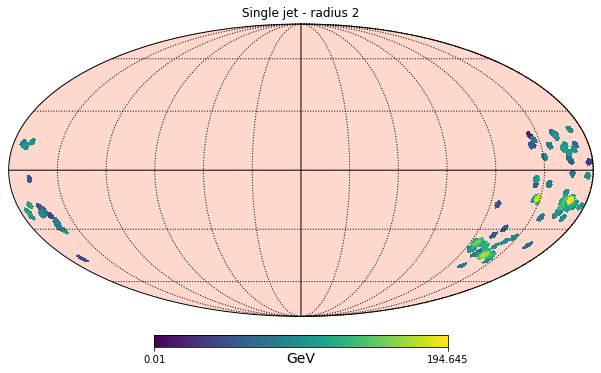

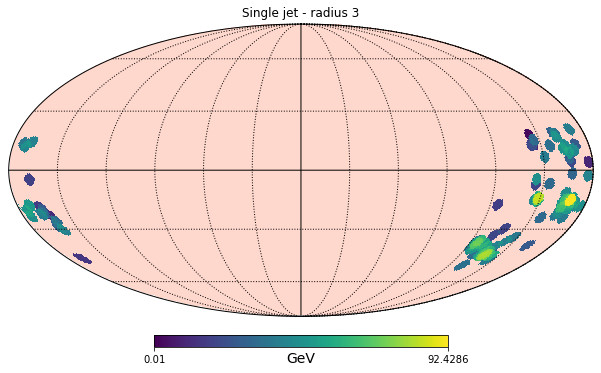

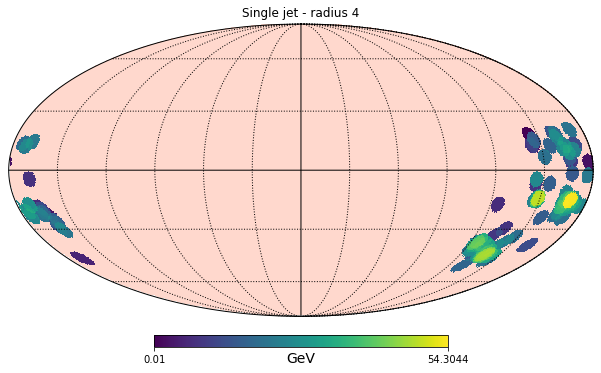

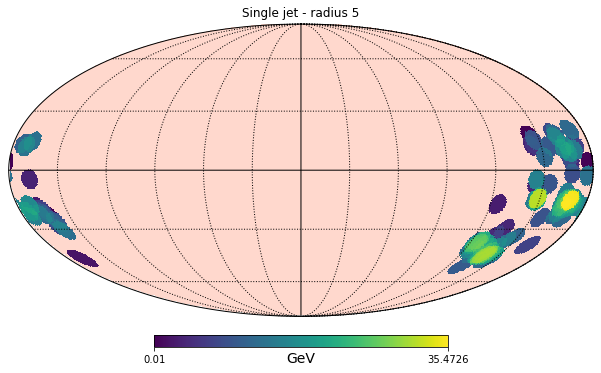

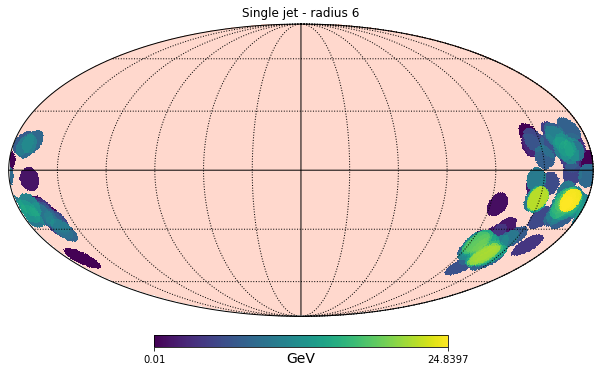

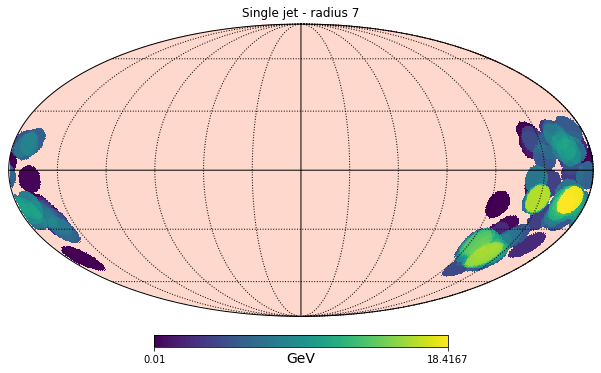

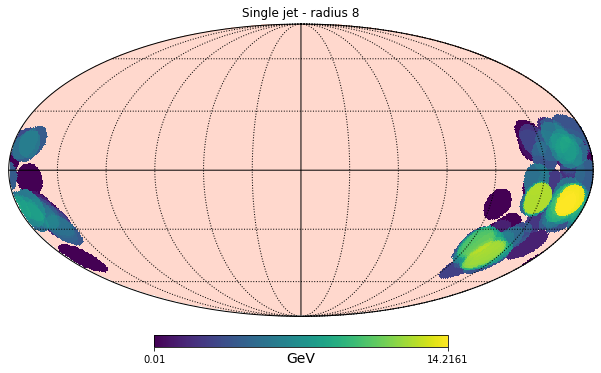

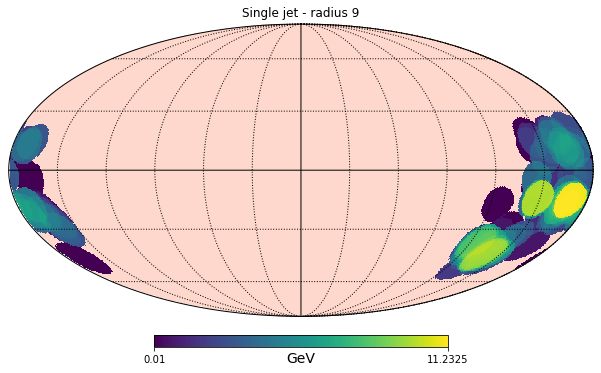

In [13]:
lmax = 150
ls = np.array(range(1,lmax+1))
nside = 128
NPIX = hp.nside2npix(nside)
for n in range(1,10,1):
    ijet = 0
    cls_list = []
    for jet_particle_test in jet_test:
        m = np.zeros(NPIX) # blank map
        ijet+=1
        for part in jet_particle_test:
            vec = hp.ang2vec(part.theta(), part.phi())
            ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(n)) # all pixels within 1 degree of vector
            m[ipix_disc] += part.energy()/(n*n) # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
        if ijet==3:
            hp.visufunc.mollview(m, title=r'Single jet - radius '+ str(n), unit=r'GeV', min=0.01, norm='log', badcolor='#FFD8CD')
            hp.graticule() # draw grid lines

Radii: [1, 2, 3, 4, 5, 6, 7, 8, 9]


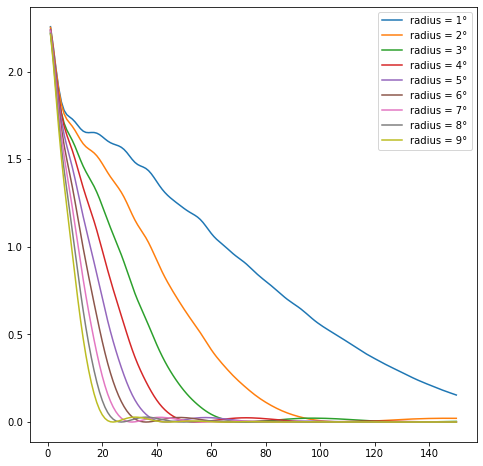

In [15]:
lmax = 150
ls = np.array(range(1,lmax+1))
nside = 128
NPIX = hp.nside2npix(nside)
radii=[]
plt.figure(figsize=(8,8))

for n in range(1,10,1):
    ijet = 0
    cls_list = []
    for jet_particle_test in jet_test:
        m = np.zeros(NPIX) # blank map
        ijet+=1
        for part in jet_particle_test:
            vec = hp.ang2vec(part.theta(), part.phi())
            ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(n)) # all pixels within 1 degree of vector
            m[ipix_disc] += part.energy()/(n*n) # energy of particle
        cls_hp = hp.sphtfunc.anafast(m)
        cls_list.append(cls_hp)
        #if ijet==3:
            #hp.visufunc.mollview(m, title=r'Single jet - radius '+ str(n), unit=r'GeV', min=0.01, norm='log', badcolor='#FFD8CD')
            #hp.graticule() # draw grid lines
            
#Plot angular power spectrum for each jet
    icls = 0
    for cls_test in cls_list:
        icls+=1
        if (icls == 1):
            cls_hp = cls_test
        else:
            cls_hp+= cls_test
    #plt.semilogy(ls,cls_hp[ls],label='radius = ' + str(n))
    plt.plot(ls,cls_hp[ls],label='radius = ' + str(n) + '°')

    radii.append(n)
print('Radii: ' + str(radii))
plt.legend()